In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from desi_retriever.denali import get_specs
from astropy.table import Table, vstack
import matplotlib.cm as cm
import scipy.ndimage as sn

In [4]:
def print_simple_number(truth_table,object_type):
    total_N = len(truth_table)
    good_N = len(truth_table[truth_table['best_quality']>=2.5])
    very_good_N = len(truth_table[truth_table['best_quality']==4])
    tmp_table = truth_table.loc[truth_table['best_quality']>=2.5]
    number_of_consistent_z = len(tmp_table.loc[abs(tmp_table['best_z']-tmp_table['Redrock_z'])/(1+tmp_table['best_z'])<0.0033])
    
    print('Number of',object_type,':',total_N)
    print('Number of ',object_type,'with quality>=2.5:',good_N, ' | fration=',good_N*1.0/total_N)
    print('Number of ',object_type,'with quality==4:',very_good_N, ' | fration=',very_good_N*1.0/total_N)
    print('Number of ',object_type,'with consistent z (with quality>=2.5):',number_of_consistent_z, '| fraction=',number_of_consistent_z/total_N)
   
    number_star = len(tmp_table.loc[tmp_table['best_spectype']=='STAR'])
    number_galaxy = len(tmp_table.loc[tmp_table['best_spectype']=='GALAXY'])
    number_qso = len(tmp_table.loc[tmp_table['best_spectype']=='QSO'])
    print('---------')  
    print('Fraction of objects with quality>=2.5')
    print('Star:',number_star*1.0/good_N)
    print('Galaxy:',number_galaxy*1.0/good_N)    
    print('QSO:',number_qso*1.0/good_N)

    plt.hist(truth_table['best_quality'],bins=8,range=(0,4))
    plt.ylabel('Number')
    plt.xlabel('Quality')
    plt.yscale('log')
    plt.xlim(0,4)
  

In [5]:
def plot_redshift_distribution(truth_table,object_type):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    x_range = [0,max(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'])]
    plt.hist(truth_table['best_z'],range=(x_range[0],x_range[1]),bins=20,color='b',label='All')
    plt.hist(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='orange',label='quality>=2.5')
    plt.hist(truth_table.loc[truth_table['best_quality']==4]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='g',label='quality=4')
    plt.yscale('log')
    plt.xlabel('Best z')
    plt.ylabel('Number')
    plt.legend()
    plt.title(object_type)
    
    plt.subplot(1,2,2)
    plt.scatter(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],truth_table.loc[truth_table['best_quality']>=2.5]['Redrock_z'],
                
                c=truth_table.loc[truth_table['best_quality']>=2.5]['best_quality'],cmap=cm.jet)
    plt.xlabel('Best z')
    plt.ylabel('Redrock z')
    plt.colorbar()

In [6]:
def plot_chi2_quality_distribution(truth_table):
    #plt.scatter(truth_table['best_quality'],truth_table['DELTACHI2'])
    #plt.ylim(1,100000)
    #plt.yscale('log')
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(np.log10(truth_table['DELTACHI2']),label='All',bins=8,range=(0,5),color='b')
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5))
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),)
    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()
    plt.subplot(1,2,2)
    
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']<2.5]['DELTACHI2']),color='grey',label='flag<2.5',bins=8,range=(0,5),histtype='step',lw=4)
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5),histtype='step',lw=4)
    #plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),histtype='step',lw=4)

    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()    
    
    
    
    

In [7]:
def give_me_ra_dec_object_with_property_cut(truth_table, property_name, cut, if_print=True):
    tmp_table = truth_table.loc[(truth_table[property_name]>=cut[0]) & (truth_table[property_name]<cut[1])]
    if if_print==True:
        for i_object in range(0,len(tmp_table)):
            print(tmp_table['TARGET_RA'].values[i_object],tmp_table['TARGET_DEC'].values[i_object])
    
    return tmp_table

In [9]:
# The filenames are tentative. We will change the filenames.
on_nersc=False
if on_nersc==True:
    dir = '/global/cfs/cdirs/desi/sv/vi/TruthTables/Cascades/'
    ELG = pd.read_csv(dir+'ELG/'+'desi-vi_SV_cascades_combination_ELG_all_210521.csv')
    ELG['DELTACHI2']=ELG['Redrock_deltachi2']
    #ELG_80606 = pd.read_csv(dir+'ELG/'+'desi-vi_ELG_tile80606_nightdeep_merged_all_210218.csv')
    
ELG = pd.read_csv('/Users/blue/Dropbox/Astro_Research/Projects_plots_notes/2020_DESI_visual_inspect/SV_VI_cascades/Cascades/ELG/output/desi-vi_SV_cascades_combination_ELG_all_210521.csv')
ELG['DELTACHI2']=ELG['Redrock_deltachi2']

In [10]:
denali_all = Table.read('/Volumes/Elements/DESI/Denali/denali_alltiles_Allzinfo.fits')
denali_all = denali_all[denali_all['coadd_type']=='cumulative']

In [11]:
new_catalog_denali = denali_all['TARGETID','Z','subset','TILEID','DELTACHI2','TARGET_RA','TARGET_DEC','LAST_NIGHT',
                              'EFFTIME_BRIGHT','FIBERFLUX_R','FLUX_R','FIBERFLUX_Z','FLUX_W1','FLUX_G','FLUX_Z','EBV','ZWARN','FIBER'].to_pandas()

In [12]:
catalog_ELG_match = ELG.merge(new_catalog_denali,on='TARGETID',how='left',suffixes=("_cascades","_denali"))
final_match_catalog = catalog_ELG_match[catalog_ELG_match['TILEID_cascades']==catalog_ELG_match['TILEID_denali']]
final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
final_match_catalog['Redrock_z']=final_match_catalog['Z']


<ipython-input-12-0a185fe2d65e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])
<ipython-input-12-0a185fe2d65e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['Redrock_z']=final_match_catalog['Z']


# ELG selection 0 0.6<z<1.58 short-deep non-repeatable

Number of ELG : 84
Number of  ELG with quality>=2.5: 69  | fration= 0.8214285714285714
Number of  ELG with quality==4: 41  | fration= 0.4880952380952381
Number of  ELG with consistent z (with quality>=2.5): 62 | fraction= 0.7380952380952381
---------
Fraction of objects with quality>=2.5
Star: 0.0
Galaxy: 0.9420289855072463
QSO: 0.057971014492753624


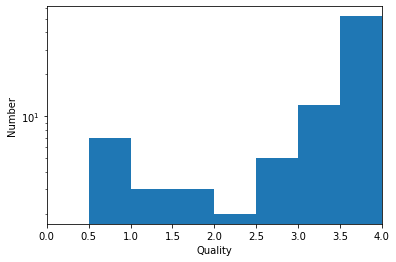

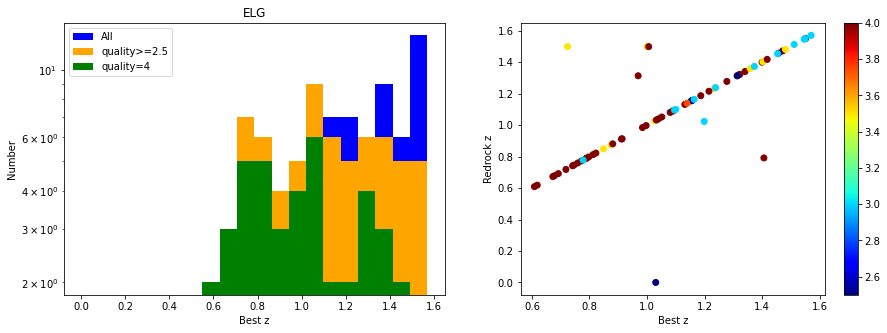

In [14]:
ELG_main = final_match_catalog[final_match_catalog['setting_name']=='sel0']
print_simple_number(ELG_main,'ELG')
plot_redshift_distribution(ELG_main,'ELG')
#plot_chi2_quality_distribution(ELG_main)

In [15]:
cut_catalog = ELG_main[(ELG_main['dz']>0.0033) & (ELG_main['best_quality']>=2.5)]

In [17]:
data_dict ={}
ELG_tile = np.array(cut_catalog['TILEID_denali'])
targetid = np.array(cut_catalog['TARGETID'])
fiberid = np.array(cut_catalog['FIBER'])
last_night = np.array(cut_catalog['LAST_NIGHT'])
print('Targetid, fiberid, tileid')
for i in range(0,len(fiberid)):
    if ELG_tile[i]==80619:
        last_night[i]=20210321
    if ELG_tile[i]==80612.0:
        last_night[i]=20201223 
    if ELG_tile[i]==80650.0:
        last_night[i]=20210322
    if ELG_tile[i]==80643.0:
        last_night[i]=20210308        
               
        
    print(targetid[i],fiberid[i],ELG_tile[i],last_night[i])
    data_dict[i]=get_specs(tileid=int(ELG_tile[i]), coadd_type='cumulative', night=int(last_night[i]), fiber=int(fiberid[i]))
   

Targetid, fiberid, tileid
39632940052775609 2209 80690 20210216
39632960256738308 2674 80690 20210216
39633293708100293 1216 80712 20210222
39627152890531399 1477 80701 20210212
39627152936665873 4022 80701 20210212
39627700788270180 2205 80605 20210205
39628443922466049 2870 80707 20210208


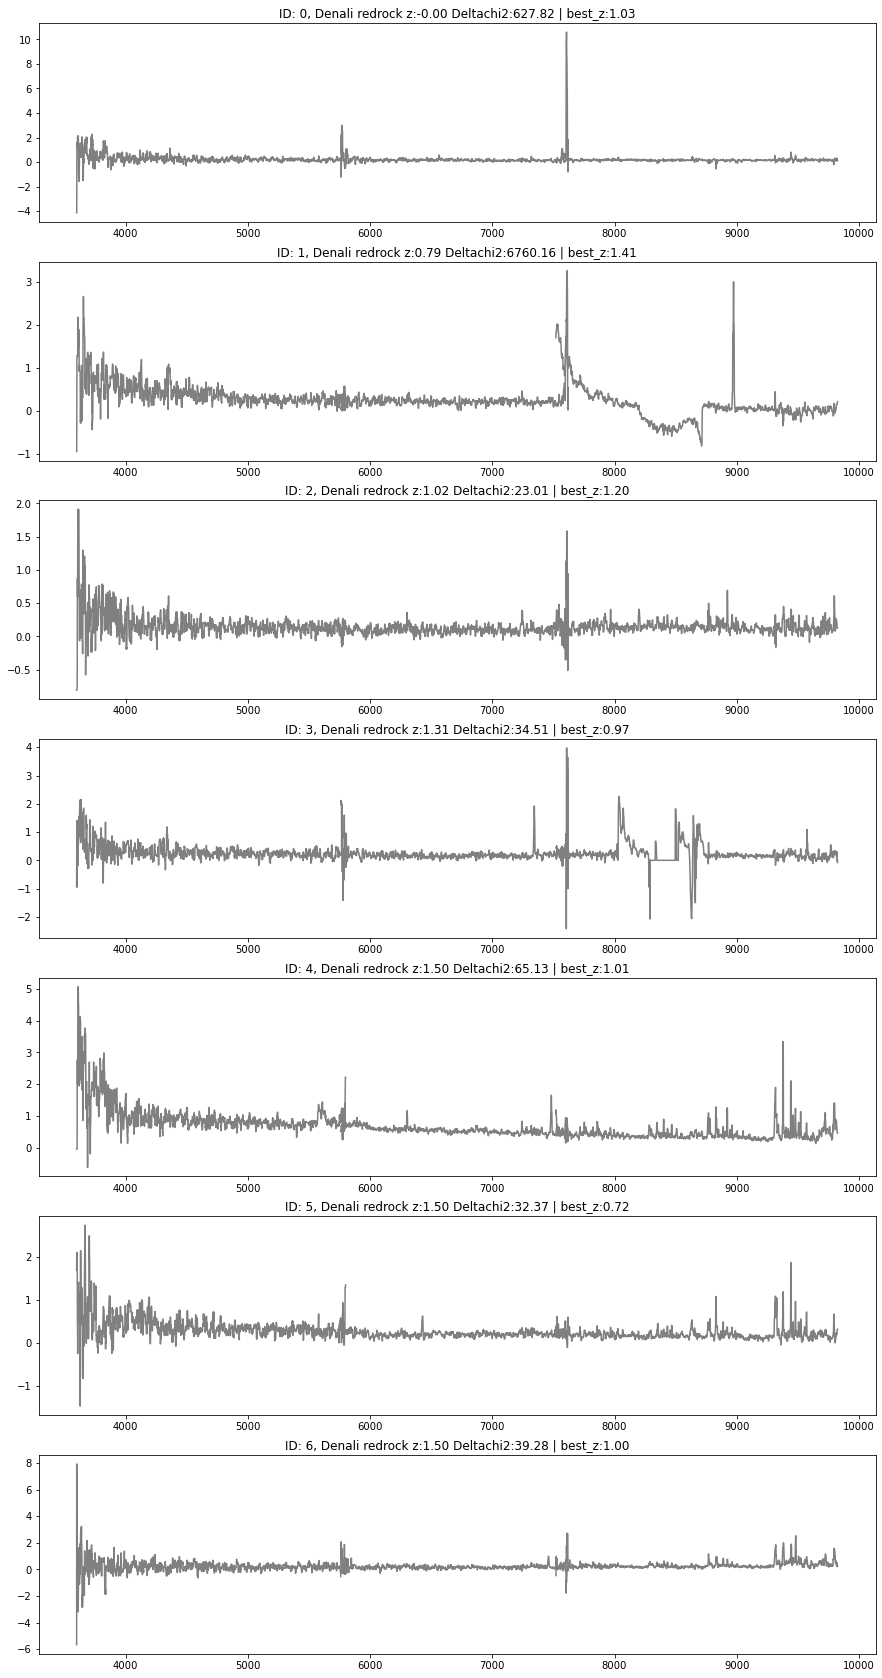

In [21]:
plt.figure(figsize=(15,30))
index = np.argsort(np.array(cut_catalog['Redrock_z']))

for i in range(0,len(index)):
    plt.subplot(len(index),1,i+1)
    plt.plot(data_dict[index[i]][0]['b_wavelength'],sn.median_filter(data_dict[index[i]][0]['b_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['r_wavelength'],sn.median_filter(data_dict[index[i]][0]['r_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['z_wavelength'],sn.median_filter(data_dict[index[i]][0]['z_flux'],10),color='grey')
    plt.title('ID: %0.0f, Denali redrock z:%0.2f Deltachi2:%0.2f | best_z:%0.2f' % (i,np.array(cut_catalog['Redrock_z'])[index[i]],np.array(cut_catalog['DELTACHI2_denali'])[index[i]],np.array(cut_catalog['best_z'])[index[i]]))

In [22]:
for i in range(0,len(index)):
    print(i,targetid[index[i]],fiberid[index[i]],ELG_tile[index[i]],np.array(cut_catalog['Redrock_z'])[index[i]])


0 39627152890531399 1477 80701 -4.147098923294423e-05
1 39632960256738308 2674 80690 0.7914878410121936
2 39628443922466049 2870 80707 1.0233461563161317
3 39633293708100293 1216 80712 1.3136701867640206
4 39627700788270180 2205 80605 1.498931876511149
5 39632940052775609 2209 80690 1.4989789378881506
6 39627152936665873 4022 80701 1.4994501219740406


# ELG selection 1 low-z<0.6 short-deep non-repeatable

Number of ELG : 279
Number of  ELG with quality>=2.5: 175  | fration= 0.6272401433691757
Number of  ELG with quality==4: 132  | fration= 0.4731182795698925
Number of  ELG with consistent z (with quality>=2.5): 123 | fraction= 0.44086021505376344
---------
Fraction of objects with quality>=2.5
Star: 0.10857142857142857
Galaxy: 0.8114285714285714
QSO: 0.08


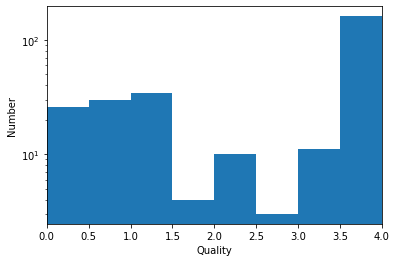

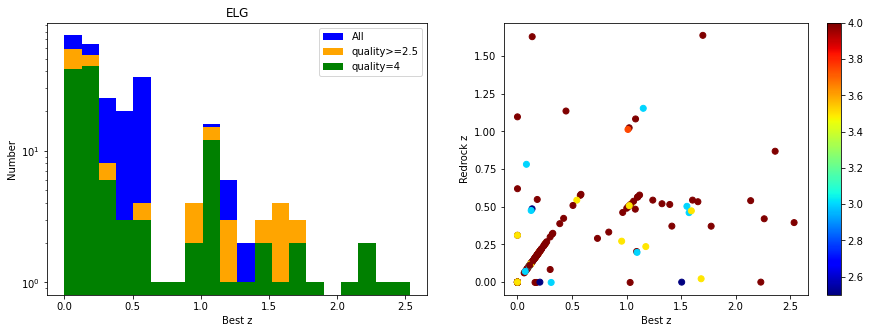

In [24]:
ELG_lowz = final_match_catalog[final_match_catalog['setting_name']=='sel1']
print_simple_number(ELG_lowz,'ELG')
plot_redshift_distribution(ELG_lowz,'ELG')
#plot_chi2_quality_distribution(ELG_lowz)

In [25]:
cut_catalog = ELG_lowz[(ELG_lowz['dz']>0.0033) & (ELG_lowz['best_quality']>=2.5)]

In [27]:
data_dict ={}
ELG_tile = np.array(cut_catalog['TILEID_denali'])
targetid = np.array(cut_catalog['TARGETID'])
fiberid = np.array(cut_catalog['FIBER'])
last_night = np.array(cut_catalog['LAST_NIGHT'])
print('Targetid, fiberid, tileid')
for i in range(0,len(fiberid)):
    if ELG_tile[i]==80619:
        last_night[i]=20210321
    if ELG_tile[i]==80612.0:
        last_night[i]=20201223 
    if ELG_tile[i]==80650.0:
        last_night[i]=20210322
    if ELG_tile[i]==80643.0:
        last_night[i]=20210308        
    if ELG_tile[i]==80621:
        last_night[i]=20201223
        
    print(targetid[i],fiberid[i],ELG_tile[i],last_night[i])
    data_dict[i]=get_specs(tileid=int(ELG_tile[i]), coadd_type='cumulative', night=int(last_night[i]), fiber=int(fiberid[i]))
   

Targetid, fiberid, tileid
39633147901513331 1070 80675 20210201
39633203077582175 4011 80676 20210109
39633207150248235 1324 80676 20210109
39633231389130918 2001 80676 20210109
39633271432151899 3994 80711 20210306
39633275190248909 3532 80711 20210306
39632945194993567 3031 80692 20210214
39632945396318273 2006 80623 20201221
39632945396320645 2402 80623 20201221
39632945400513083 2053 80622 20201221
39632945404707468 2356 80622 20201221
39632950198798990 3198 80690 20210216
39632950517565814 2596 80700 20210208
39632994876524990 2432 80686 20210309
39633004435344192 3547 80677 20210205
39633018993774615 2313 80677 20210205
39633023834001331 2663 80677 20210205
39627136817957382 552 80701 20210212
39627136843120717 360 80701 20210212
39627158309569674 3994 80701 20210212
39627179956372010 2385 80701 20210212
39627289687756017 4833 80673 20210206
39627329395237794 2162 80673 20210206
39627329428788373 3265 80673 20210206
39627773274235040 965 80669 20210206
39633354928161745 3064 8060

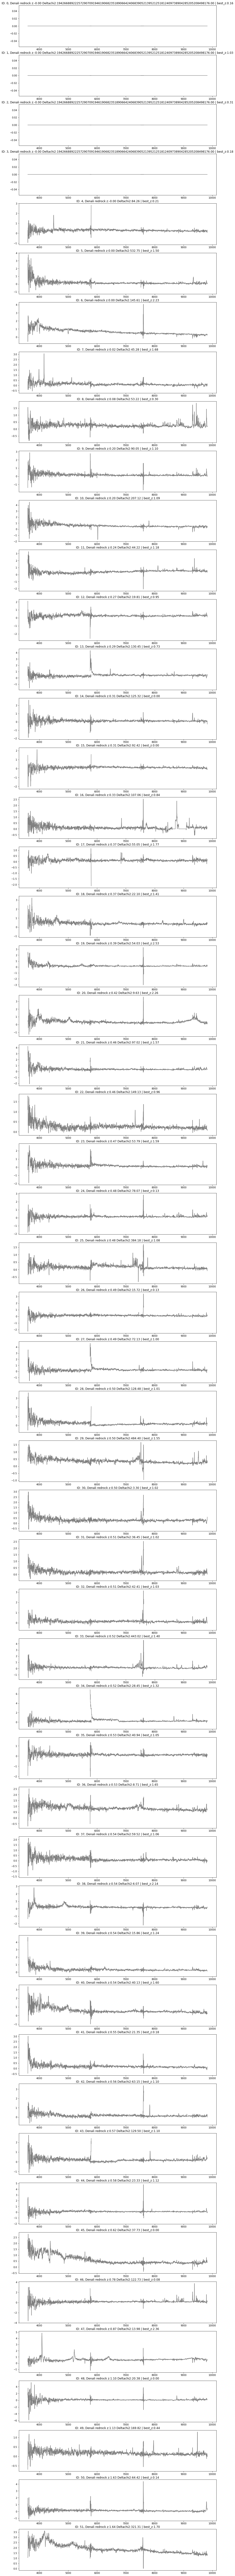

In [28]:
plt.figure(figsize=(15,200))
index = np.argsort(np.array(cut_catalog['Redrock_z']))

for i in range(0,len(index)):
    plt.subplot(len(index),1,i+1)
    plt.plot(data_dict[index[i]][0]['b_wavelength'],sn.median_filter(data_dict[index[i]][0]['b_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['r_wavelength'],sn.median_filter(data_dict[index[i]][0]['r_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['z_wavelength'],sn.median_filter(data_dict[index[i]][0]['z_flux'],10),color='grey')
    plt.title('ID: %0.0f, Denali redrock z:%0.2f Deltachi2:%0.2f | best_z:%0.2f' % (i,np.array(cut_catalog['Redrock_z'])[index[i]],np.array(cut_catalog['DELTACHI2_denali'])[index[i]],np.array(cut_catalog['best_z'])[index[i]]))

In [29]:
for i in range(0,len(index)):
    print(i,targetid[index[i]],fiberid[index[i]],ELG_tile[index[i]],np.array(cut_catalog['Redrock_z'])[index[i]])


0 39632945396320645 2402 80623 -0.0019956912923479522
1 39632945404707468 2356 80622 -0.0019956912923479522
2 39632945396318273 2006 80623 -0.0019956912923479522
3 39632945400513083 2053 80622 -0.0019956912923479522
4 39632994876524990 2432 80686 -6.615616228527713e-05
5 39627329395237794 2162 80673 1.9465674006498147e-05
6 39632940061167142 2820 80690 0.00017445618244188316
7 39628334006538110 2950 80688 0.022498599366069252
8 39627950861062512 4210 80709 0.08388464298245074
9 39627773274235040 965 80669 0.19733353064477768
10 39627179956372010 2385 80701 0.20326360889287734
11 39627289687756017 4833 80673 0.23583856858334748
12 39628500793034319 174 80682 0.2717279712540209
13 39628180234963881 3196 80683 0.29025951211395473
14 39627329428788373 3265 80673 0.31079622554006847
15 39633018993774615 2313 80677 0.31086344891076745
16 39633023834001331 2663 80677 0.33193141368791224
17 39628433235379670 2492 80707 0.3710506661747792
18 39632945194993567 3031 80692 0.37153691253794713
19 3

# ELG selection 2 high-z >1.635 short-deep non-repeatable

Number of ELG : 377
Number of  ELG with quality>=2.5: 343  | fration= 0.9098143236074271
Number of  ELG with quality==4: 267  | fration= 0.7082228116710876
Number of  ELG with consistent z (with quality>=2.5): 254 | fraction= 0.6737400530503979
---------
Fraction of objects with quality>=2.5
Star: 0.011661807580174927
Galaxy: 0.09037900874635568
QSO: 0.8979591836734694


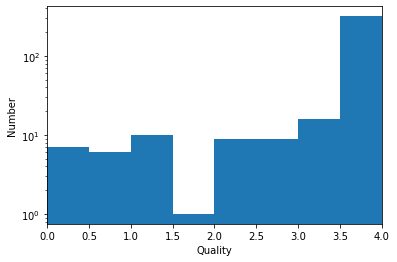

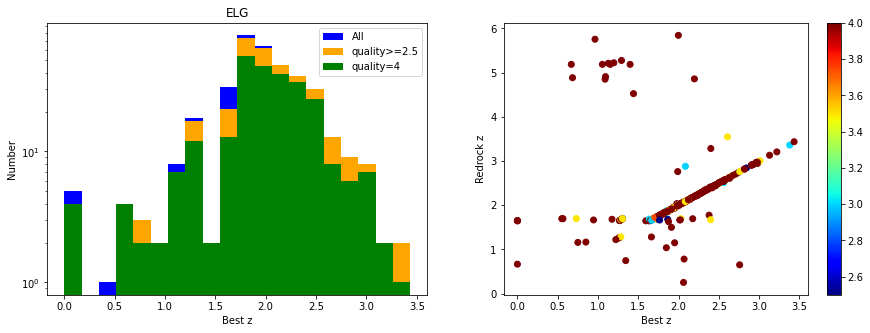

In [30]:
ELG_highz_16 = final_match_catalog[final_match_catalog['setting_name']=='sel2']
print_simple_number(ELG_highz_16,'ELG')
plot_redshift_distribution(ELG_highz_16,'ELG')
#plot_chi2_quality_distribution(ELG_highz_16)

In [31]:
cut_catalog = ELG_highz_16[(ELG_highz_16['dz']>0.0033) & (ELG_highz_16['best_quality']>=2.5)]

In [33]:
data_dict ={}
ELG_tile = np.array(cut_catalog['TILEID_denali'])
targetid = np.array(cut_catalog['TARGETID'])
fiberid = np.array(cut_catalog['FIBER'])
last_night = np.array(cut_catalog['LAST_NIGHT'])
print('Targetid, fiberid, tileid')
for i in range(0,len(fiberid)):
    if ELG_tile[i]==80619:
        last_night[i]=20210321
    if ELG_tile[i]==80612.0:
        last_night[i]=20201223 
    if ELG_tile[i]==80650.0:
        last_night[i]=20210322
    if ELG_tile[i]==80643.0:
        last_night[i]=20210308        
    if ELG_tile[i]==80621:
        last_night[i]=20201223
    if ELG_tile[i]==80699:
        last_night[i]=20210305
    print(targetid[i],fiberid[i],ELG_tile[i],last_night[i])
    data_dict[i]=get_specs(tileid=int(ELG_tile[i]), coadd_type='cumulative', night=int(last_night[i]), fiber=int(fiberid[i]))
   

Targetid, fiberid, tileid
39632955508785410 2756 80622 20201221
39632984738892556 1060 80677 20210205
39632984965385164 2681 80685 20210216
39632989675586230 1216 80677 20210205
39633023842387365 2858 80677 20210205
39633023854973343 3488 80677 20210205
39633061914089012 3816 80678 20210206
39633071250607687 3236 80678 20210206
39633075881116503 2008 80678 20210206
39633075885311776 2057 80678 20210206
39633080524212683 2669 80678 20210206
39633130482568516 2671 80679 20210206
39633143535243067 989 80675 20210201
39633165249151668 3692 80675 20210201
39628289228145122 4746 80688 20210206
39628300485658616 4424 80688 20210206
39628411710214521 1007 80707 20210208
39628422535709634 3825 80707 20210208
39628427883450222 3442 80707 20210208
39628427891839197 3713 80707 20210208
39628433256355105 3647 80707 20210208
39628438599893946 3292 80707 20210208
39628501287961001 337 80700 20210208
39628505981389046 4796 80682 20210109
39628511555619025 989 80699 20210305
39628511572395271 286 80699

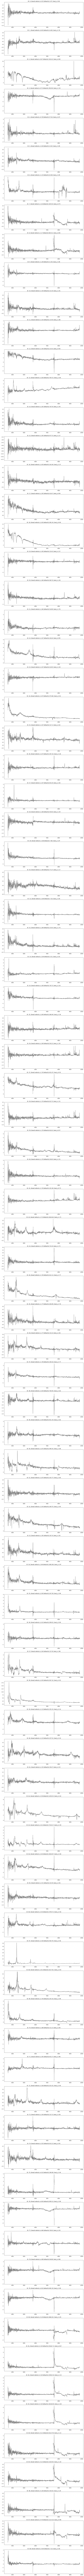

In [36]:
plt.figure(figsize=(15,500))
index = np.argsort(np.array(cut_catalog['Redrock_z']))

for i in range(0,len(index)):
    plt.subplot(len(index),1,i+1)
    plt.plot(data_dict[index[i]][0]['b_wavelength'],sn.median_filter(data_dict[index[i]][0]['b_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['r_wavelength'],sn.median_filter(data_dict[index[i]][0]['r_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['z_wavelength'],sn.median_filter(data_dict[index[i]][0]['z_flux'],10),color='grey')
    plt.title('ID: %0.0f, Denali redrock z:%0.2f Deltachi2:%0.2f | best_z:%0.2f' % (i,np.array(cut_catalog['Redrock_z'])[index[i]],np.array(cut_catalog['DELTACHI2_denali'])[index[i]],np.array(cut_catalog['best_z'])[index[i]]))

In [37]:
for i in range(0,len(index)):
    print(i,targetid[index[i]],fiberid[index[i]],ELG_tile[index[i]],np.array(cut_catalog['Redrock_z'])[index[i]])


0 39627658610351253 141 80605 0.2521644483969139
1 39633061914089012 3816 80678 0.6509086588867522
2 39628511572395271 286 80699 0.6656914179958988
3 39628511555619025 989 80699 0.7460076440817948
4 39627142186664438 293 80701 0.7815265739639667
5 39627682702434648 2801 80605 1.0380708103362435
6 39632989675586230 1216 80677 1.149140768455123
7 39633293687129032 2678 80711 1.1580737320941998
8 39627992799904617 2670 80709 1.1652743992161636
9 39627694765249983 2514 80605 1.2809967625110905
10 39627658610351585 297 80605 1.499686685068712
11 39627278400885183 60 80673 1.6276784882691684
12 39632984738892556 1060 80677 1.6434026222102478
13 39633071250607687 3236 80678 1.6444140233912765
14 39633075885311776 2057 80678 1.6463506868976925
15 39633165249151668 3692 80675 1.6517682872220107
16 39628422535709634 3825 80707 1.652262841516584
17 39628197561634293 375 80684 1.6524709465682732
18 39633282630943176 2014 80711 1.6535789950142605
19 39633561220809080 4164 80693 1.6545642639217693
2

# ELG selection 3 high-z short-deep non-repeatable

Number of ELG : 266
Number of  ELG with quality>=2.5: 150  | fration= 0.5639097744360902
Number of  ELG with quality==4: 69  | fration= 0.2593984962406015
Number of  ELG with consistent z (with quality>=2.5): 136 | fraction= 0.5112781954887218
---------
Fraction of objects with quality>=2.5
Star: 0.013333333333333334
Galaxy: 0.84
QSO: 0.14666666666666667


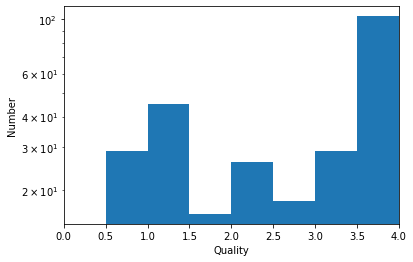

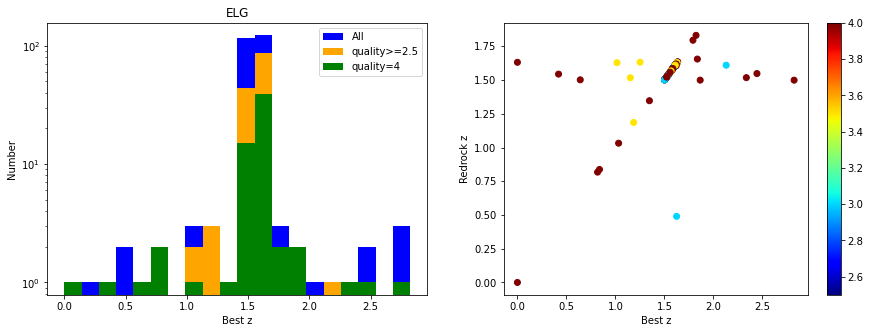

In [38]:
ELG_highz_inconsistent = final_match_catalog[final_match_catalog['setting_name']=='sel3']
print_simple_number(ELG_highz_inconsistent,'ELG')
plot_redshift_distribution(ELG_highz_inconsistent,'ELG')
#plot_chi2_quality_distribution(ELG_highz_inconsistent)

In [39]:
cut_catalog = ELG_highz_inconsistent[(ELG_highz_inconsistent['dz']>0.0033) & (ELG_highz_inconsistent['best_quality']>=2.5)]

In [40]:
data_dict ={}
ELG_tile = np.array(cut_catalog['TILEID_denali'])
targetid = np.array(cut_catalog['TARGETID'])
fiberid = np.array(cut_catalog['FIBER'])
last_night = np.array(cut_catalog['LAST_NIGHT'])
print('Targetid, fiberid, tileid')
for i in range(0,len(fiberid)):
    if ELG_tile[i]==80619:
        last_night[i]=20210321
    if ELG_tile[i]==80612.0:
        last_night[i]=20201223 
    if ELG_tile[i]==80650.0:
        last_night[i]=20210322
    if ELG_tile[i]==80643.0:
        last_night[i]=20210308        
    if ELG_tile[i]==80621:
        last_night[i]=20201223
    if ELG_tile[i]==80699:
        last_night[i]=20210305
    print(targetid[i],fiberid[i],ELG_tile[i],last_night[i])
    data_dict[i]=get_specs(tileid=int(ELG_tile[i]), coadd_type='cumulative', night=int(last_night[i]), fiber=int(fiberid[i]))
   

Targetid, fiberid, tileid
39628180234961090 3298 80683 20210206
39628427883448574 3448 80707 20210208
39633211277447717 4089 80676 20210109
39633560402920645 817 80694 20210306
39632960588090014 2664 80700 20210208
39633023846586543 3454 80677 20210205
39633080637459123 61 80679 20210206
39633139324162388 4909 80680 20210208
39633152301337733 4353 80675 20210201
39627318007700853 2101 80673 20210206
39627329407812316 2064 80673 20210206
39633567084448922 2665 80694 20210306
39628521303185026 4891 80681 20210109
39632940409293050 3200 80700 20210208


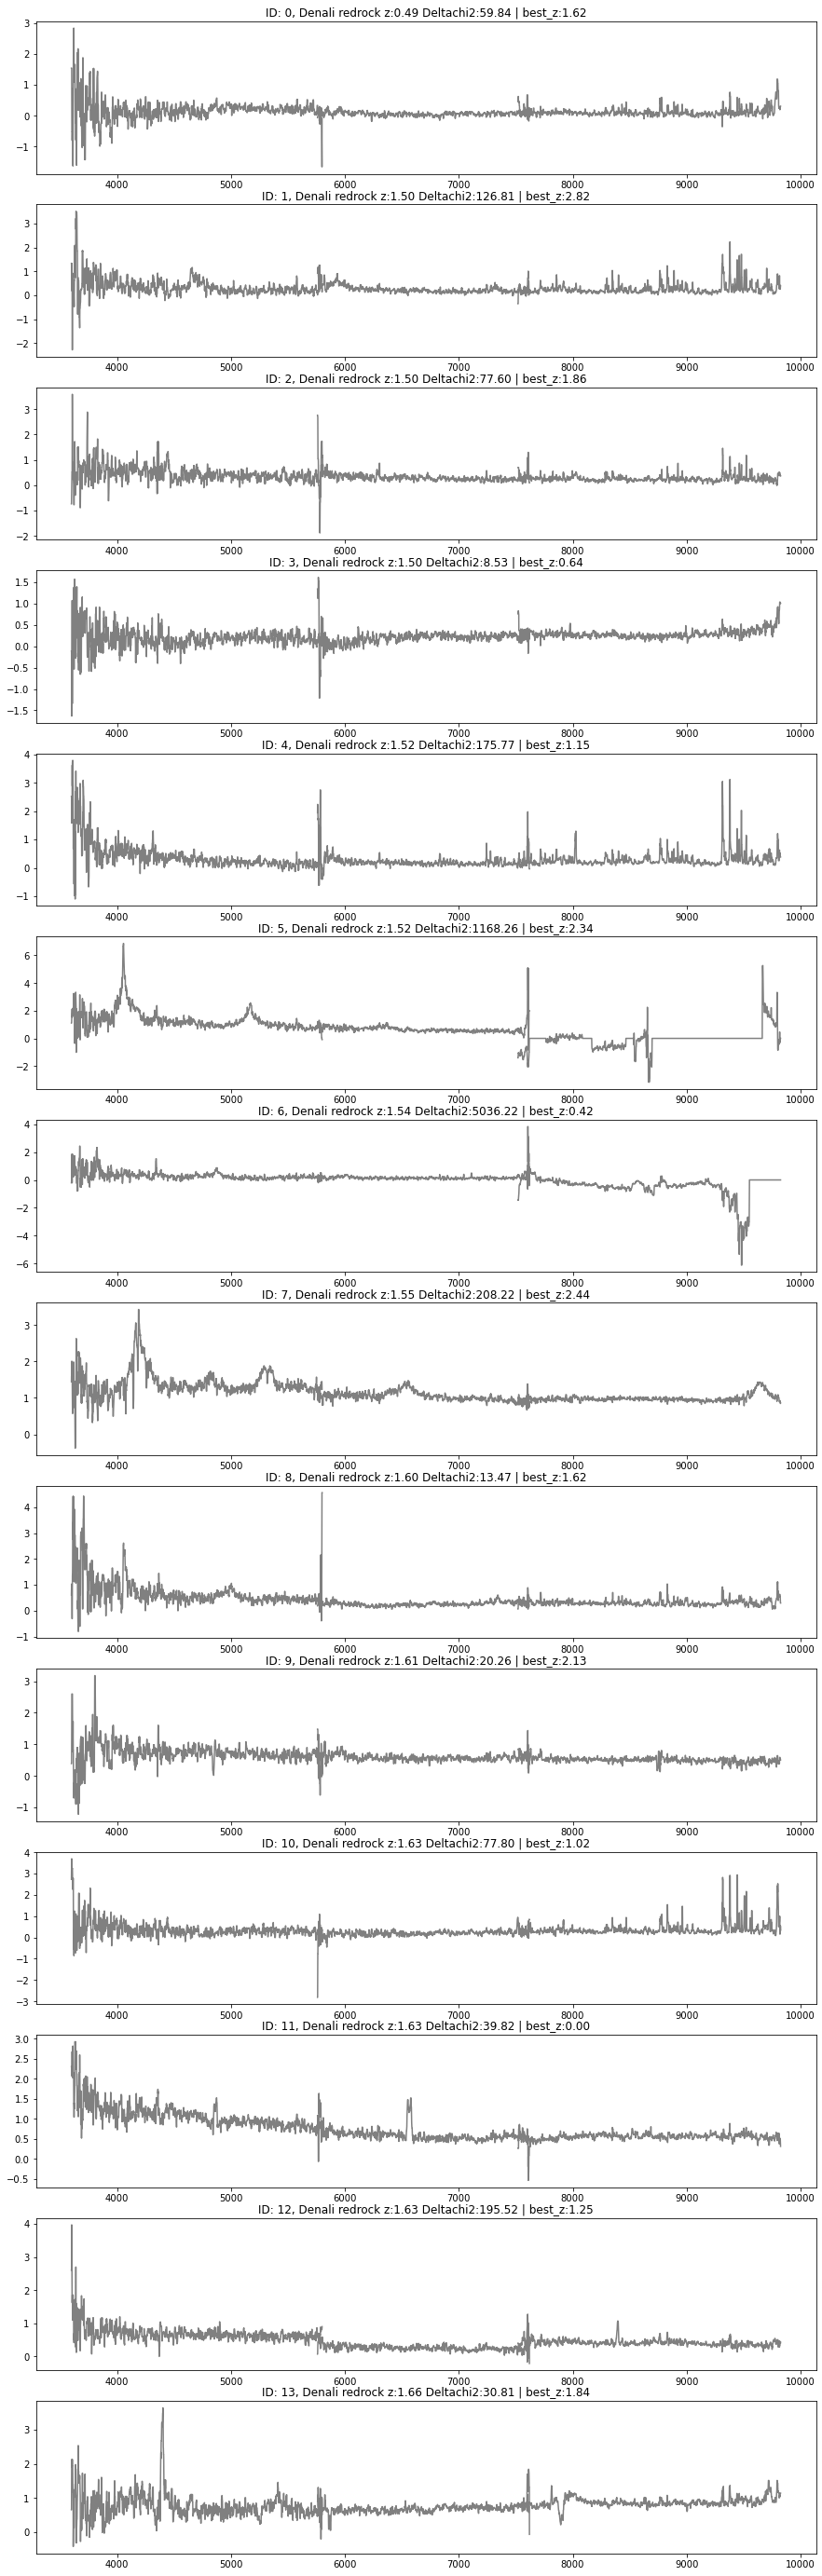

In [42]:
plt.figure(figsize=(15,50))
index = np.argsort(np.array(cut_catalog['Redrock_z']))

for i in range(0,len(index)):
    plt.subplot(len(index),1,i+1)
    plt.plot(data_dict[index[i]][0]['b_wavelength'],sn.median_filter(data_dict[index[i]][0]['b_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['r_wavelength'],sn.median_filter(data_dict[index[i]][0]['r_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['z_wavelength'],sn.median_filter(data_dict[index[i]][0]['z_flux'],10),color='grey')
    plt.title('ID: %0.0f, Denali redrock z:%0.2f Deltachi2:%0.2f | best_z:%0.2f' % (i,np.array(cut_catalog['Redrock_z'])[index[i]],np.array(cut_catalog['DELTACHI2_denali'])[index[i]],np.array(cut_catalog['best_z'])[index[i]]))

In [43]:
for i in range(0,len(index)):
    print(i,targetid[index[i]],fiberid[index[i]],ELG_tile[index[i]],np.array(cut_catalog['Redrock_z'])[index[i]])


0 39627318007700853 2101 80673 0.49001070951249326
1 39633211277447717 4089 80676 1.4990215105940237
2 39632940409293050 3200 80700 1.4992435227415246
3 39633023846586543 3454 80677 1.5015482290403215
4 39633560402920645 817 80694 1.516797899590079
5 39632960588090014 2664 80700 1.5177403815231216
6 39633567084448922 2665 80694 1.5439137853638747
7 39633139324162388 4909 80680 1.5480536208298221
8 39627329407812316 2064 80673 1.6047527240473847
9 39628180234961090 3298 80683 1.6098777640461104
10 39628427883448574 3448 80707 1.6286143931940569
11 39633152301337733 4353 80675 1.631314081931664
12 39628521303185026 4891 80681 1.632227989820105
13 39633080637459123 61 80679 1.6553498137201748


# ELG selection 4 high-z combined deltach2

Number of ELG : 368
Number of  ELG with quality>=2.5: 356  | fration= 0.967391304347826
Number of  ELG with quality==4: 171  | fration= 0.46467391304347827
Number of  ELG with consistent z (with quality>=2.5): 349 | fraction= 0.9483695652173914
---------
Fraction of objects with quality>=2.5
Star: 0.0
Galaxy: 0.9831460674157303
QSO: 0.016853932584269662


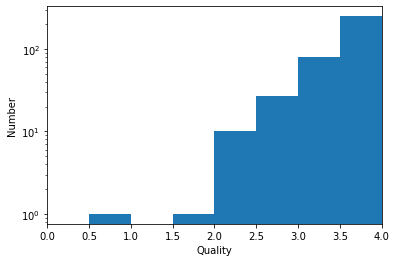

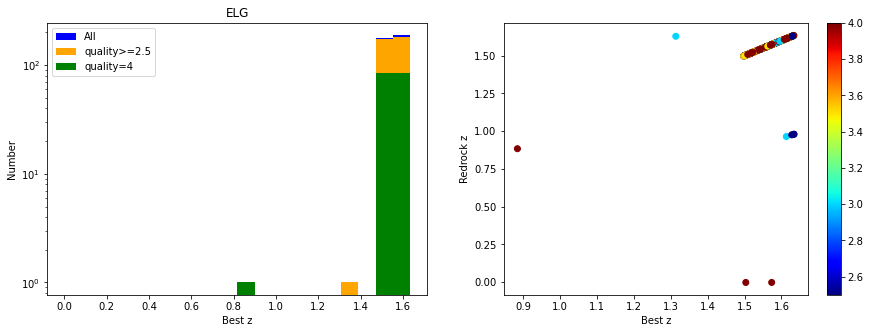

In [44]:
#ELG = pd.read_csv('desi-vi_ELG_tile80608_nightdeep_merged_all_210203.csv')
ELG_highz = final_match_catalog[final_match_catalog['setting_name']=='sel4']
print_simple_number(ELG_highz,'ELG')
plot_redshift_distribution(ELG_highz,'ELG')
#plot_chi2_quality_distribution(ELG_highz)

In [47]:
cut_catalog = ELG_highz[(ELG_highz['dz']>0.0033) & (ELG_highz['best_quality']>=2.5)]




In [48]:
data_dict ={}
ELG_tile = np.array(cut_catalog['TILEID_denali'])
targetid = np.array(cut_catalog['TARGETID'])
fiberid = np.array(cut_catalog['FIBER'])
last_night = np.array(cut_catalog['LAST_NIGHT'])
print('Targetid, fiberid, tileid')
for i in range(0,len(fiberid)):
    if ELG_tile[i]==80619:
        last_night[i]=20210321
    if ELG_tile[i]==80612.0:
        last_night[i]=20201223 
    if ELG_tile[i]==80650.0:
        last_night[i]=20210322
    if ELG_tile[i]==80643.0:
        last_night[i]=20210308        
    if ELG_tile[i]==80621:
        last_night[i]=20201223
    if ELG_tile[i]==80699:
        last_night[i]=20210305
    print(targetid[i],fiberid[i],ELG_tile[i],last_night[i])
    data_dict[i]=get_specs(tileid=int(ELG_tile[i]), coadd_type='cumulative', night=int(last_night[i]), fiber=int(fiberid[i]))
   

Targetid, fiberid, tileid
39632930166801139 3520 80622 20201221
39633427028248856 367 80620 20201221
39633432409541754 68 80621 20201223
39627323703561553 2290 80673 20210206
39627787836854653 3926 80705 20210218
39627815586368489 3772 80669 20210206
39632954992888795 1481 80685 20210216


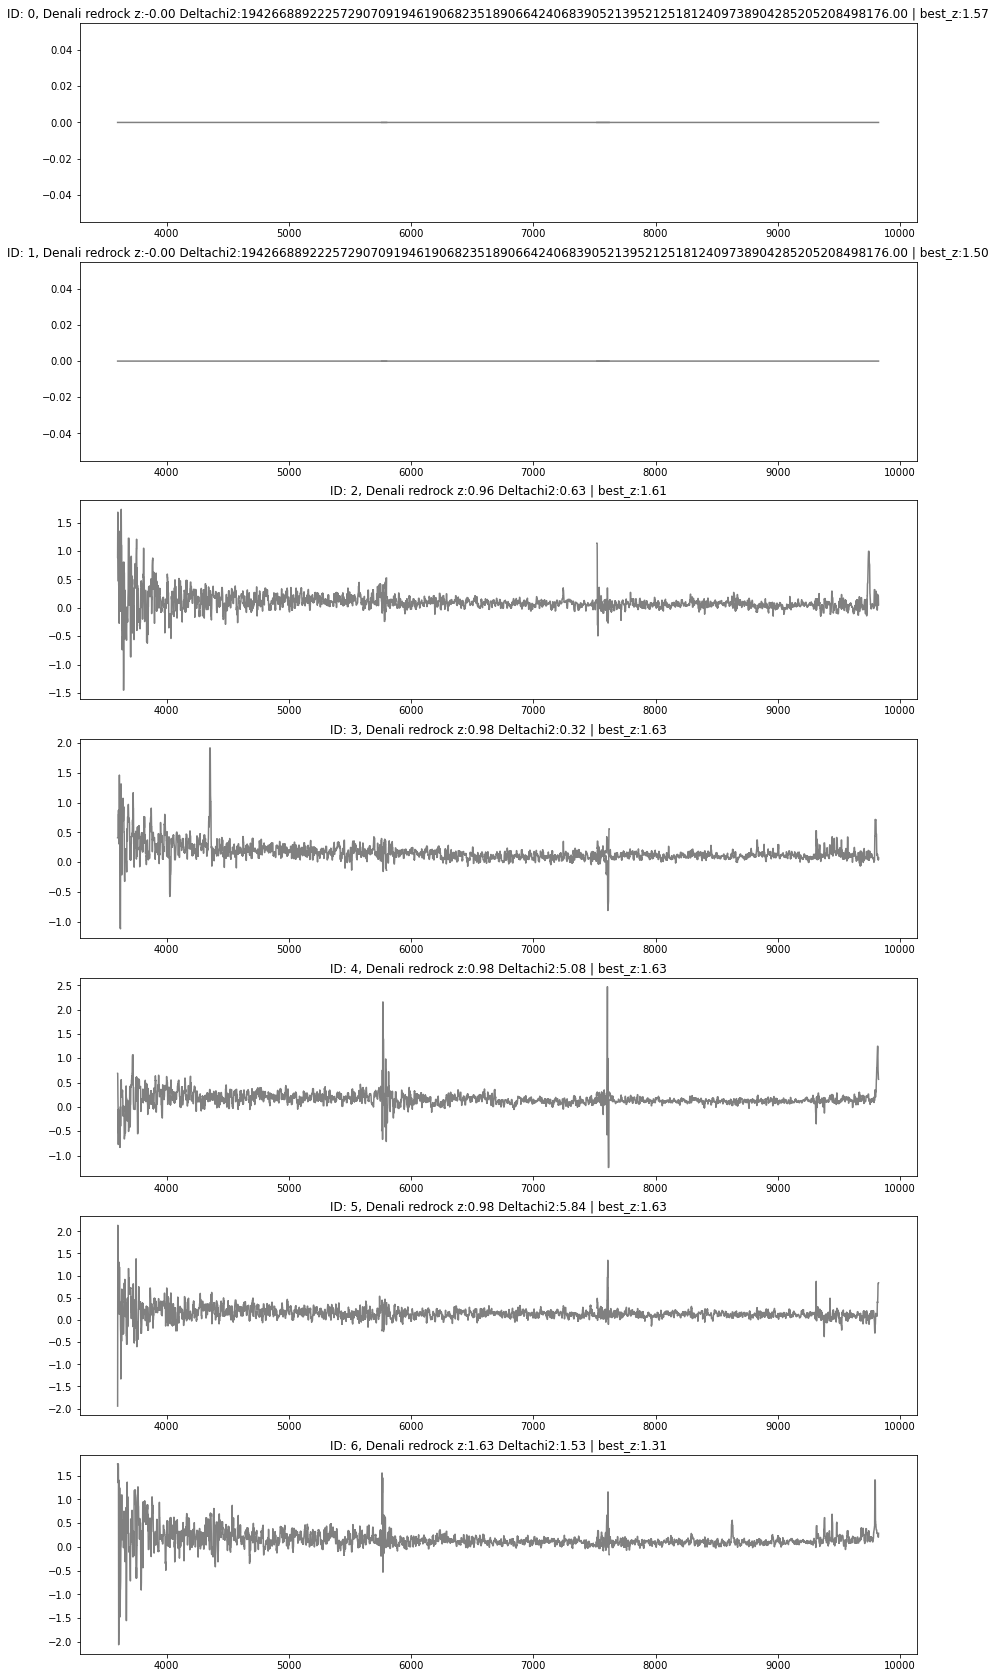

In [50]:
plt.figure(figsize=(15,30))
index = np.argsort(np.array(cut_catalog['Redrock_z']))

for i in range(0,len(index)):
    plt.subplot(len(index),1,i+1)
    plt.plot(data_dict[index[i]][0]['b_wavelength'],sn.median_filter(data_dict[index[i]][0]['b_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['r_wavelength'],sn.median_filter(data_dict[index[i]][0]['r_flux'],10),color='grey')
    plt.plot(data_dict[index[i]][0]['z_wavelength'],sn.median_filter(data_dict[index[i]][0]['z_flux'],10),color='grey')
    plt.title('ID: %0.0f, Denali redrock z:%0.2f Deltachi2:%0.2f | best_z:%0.2f' % (i,np.array(cut_catalog['Redrock_z'])[index[i]],np.array(cut_catalog['DELTACHI2_denali'])[index[i]],np.array(cut_catalog['best_z'])[index[i]]))

In [51]:
for i in range(0,len(index)):
    print(i,targetid[index[i]],fiberid[index[i]],ELG_tile[index[i]],np.array(cut_catalog['Redrock_z'])[index[i]])


0 39632930166801139 3520 80622 -0.0019956912923479522
1 39633427028248856 367 80620 -0.0019956912923479522
2 39627323703561553 2290 80673 0.9644620478640934
3 39627815586368489 3772 80669 0.9757808204545714
4 39632954992888795 1481 80685 0.9784553084485592
5 39627787836854653 3926 80705 0.980207990611791
6 39633432409541754 68 80621 1.6286832158651914
